In [1]:
import pandas as pd

In [2]:
#Obtenemos los datos contenidos en nuetro archivo
pacientes=pd.read_csv('Pacientes2.csv',engine='python',index_col=0)

In [3]:
pacientes.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [4]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [6]:
#Variables Predictoras
X = pacientes.iloc[:,1:11]

#Variable a Predecir
Y = pacientes.iloc[:,0]

X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


Se paramos los datos de entrenamiento con los dato de test

In [7]:
from sklearn.model_selection import train_test_split
#X_train y Y_train para entrenamiento
#X_test y Y_test para entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state=0)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 731 to 28
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HIPERTEN  738 non-null    int64
 1   HIPERGLU  738 non-null    int64
 2   HDLBAJA   738 non-null    int64
 3   HIPERTRI  738 non-null    int64
 4   CINTALTA  738 non-null    int64
 5   EDAD      738 non-null    int64
 6   GENERO    738 non-null    int64
 7   FUMA      738 non-null    int64
 8   ALCOHOL   738 non-null    int64
 9   POLIURIA  738 non-null    int64
dtypes: int64(10)
memory usage: 63.4 KB


Creamos el modelo del Arbol de Decisiones
y le especificamos la cantidad de niveles que tendra el arbol, en este caso 4

In [10]:
from sklearn.tree import DecisionTreeClassifier
#Llamamos al contructor de arbol de decisiones
arbol = DecisionTreeClassifier(max_depth=4)

#Entrenamos el modelo
arbol_enfermedad = arbol.fit(X_train,Y_train)

### Graficamos el Arbol de Decisiones

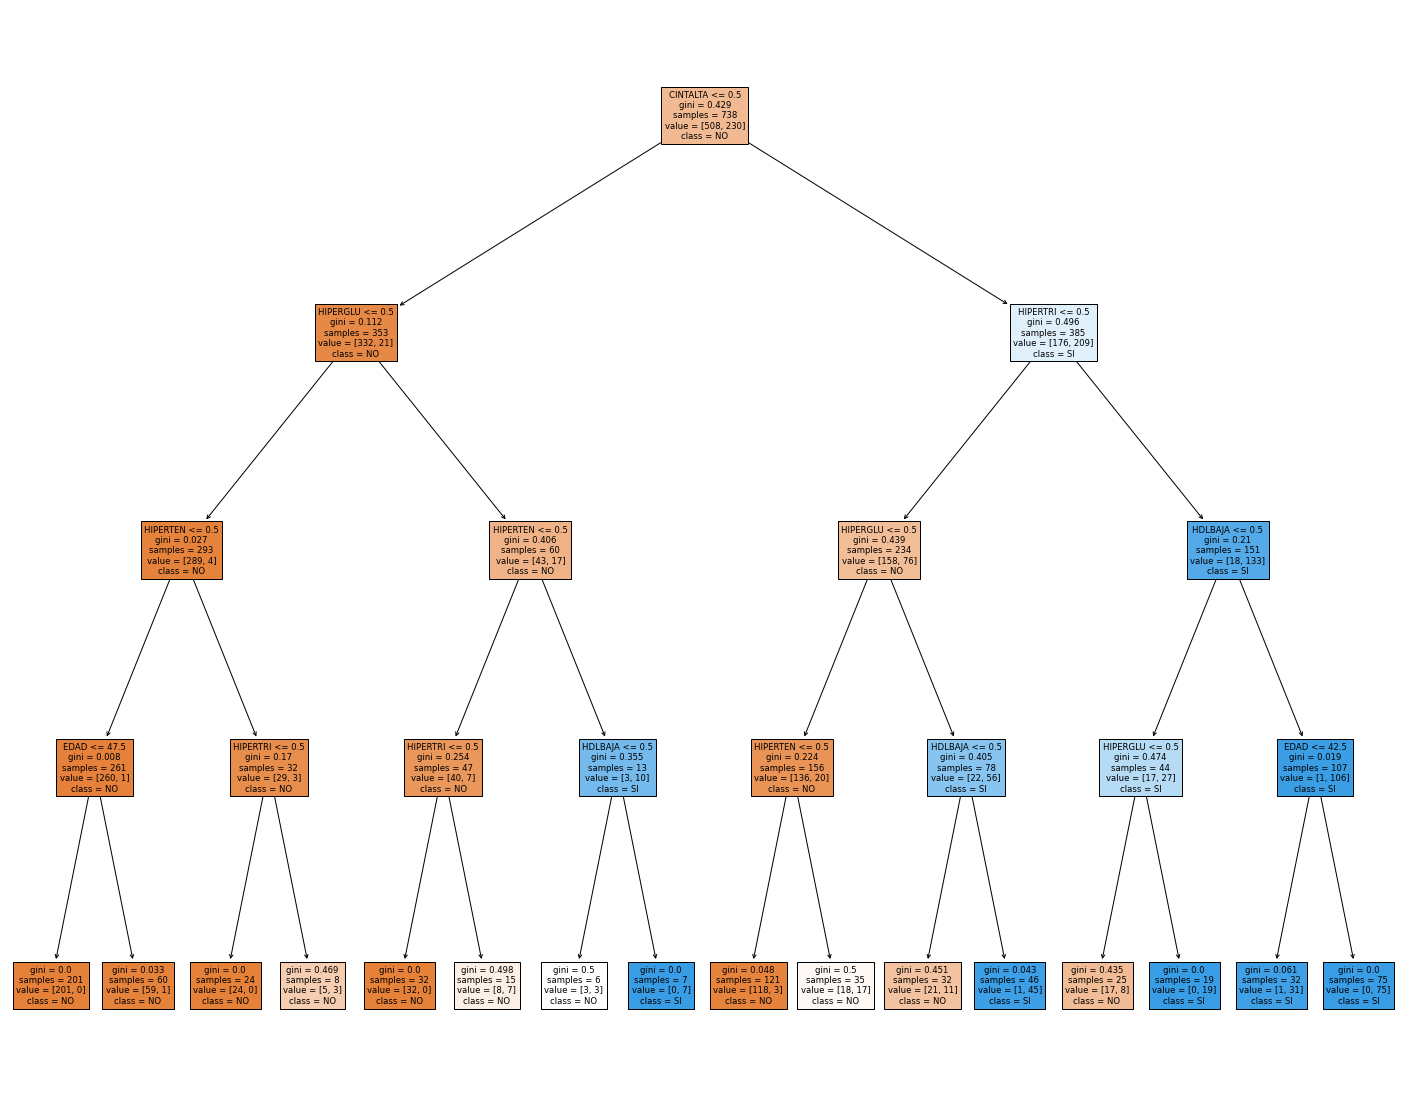

In [12]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20)) #Le damos las dimenciones del grafico
tree.plot_tree(arbol_enfermedad,feature_names=list(X.columns.values),class_names=list(Y.values),filled=True)
plt.show()

In [13]:
fig.savefig("Arbol de decisiones.png") #Guardamos la imagen del arbol de decisiones como png, para visualizarlo mejor

Realizamos el test con los datos de prueva

In [14]:
#Realizamos el test con los datos de prueva
Y_pred = arbol_enfermedad.predict(X_test)
Y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

Creamos la matriz de confusion para hallar la precision del modelo

In [15]:
from sklearn.metrics import confusion_matrix

Matriz_de_confusion = confusion_matrix(Y_test, Y_pred)

Matriz_de_confusion

array([[178,   3],
       [ 12,  54]], dtype=int64)

Calculamos la precision global del modelo

In [16]:
import numpy as np
Precision_Global = np.sum(Matriz_de_confusion.diagonal())/np.sum(Matriz_de_confusion)
Precision_Global 

0.9392712550607287

Tambien hallamos la precision para la clase de No

In [21]:
Precision_No = (Matriz_de_confusion[0,0])/sum(Matriz_de_confusion[0,])
Precision_No

0.9834254143646409

Tambien hallamos la precision para la clase de Si

In [20]:
Precision_Si = (Matriz_de_confusion[1,1])/sum(Matriz_de_confusion[1,])
Precision_Si

0.8181818181818182